In [2]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [3]:
df = pd.read_csv('heart.csv')
df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder_x = LabelEncoder()


# fit the encoder on the 'sex' column of your dataset
encoder.fit(df['sex'])
encoder_x.fit(df['target'])

# transform the 'sex' column of your dataset using the encoder
df['sex'] = encoder.fit_transform(df['sex'])
df['target'] = encoder_x.fit_transform(df['target'])


df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,0


In [46]:
df['trestbps'] = df['trestbps'] .fillna(df['trestbps'].mean())
df['thalach'] = df['thalach'] .fillna(df['thalach'].mean())
df['chol'] = df['chol'] .fillna(df['chol'].mean())

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.000000,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.000000,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.000000,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,131.712375,131.0,0,1,115.0,1,1.2,1,1,3,0


In [6]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1
5,57,1,0,140.000000,192.0,0,1,148.0,0,0.4,1,0,1,1
6,56,0,1,140.000000,294.0,0,0,153.0,0,1.3,1,0,2,1
7,44,1,1,120.000000,263.0,0,1,173.0,0,0.0,2,0,3,1
8,52,1,2,172.000000,199.0,1,1,162.0,0,0.5,2,0,3,1
9,57,1,2,150.000000,168.0,0,1,174.0,0,1.6,2,0,2,1


In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

<AxesSubplot: >

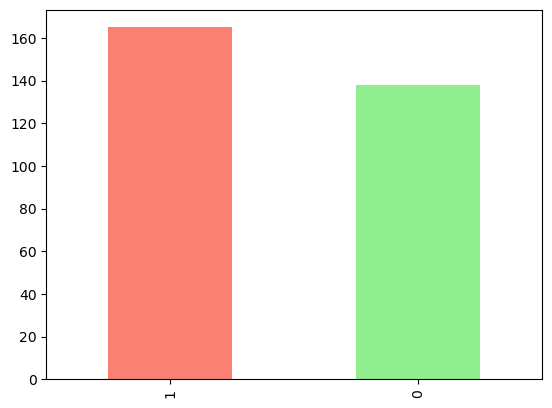

In [9]:
df.target.value_counts().plot(kind='bar', color=["salmon",'lightgreen'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int32  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int32  
dtypes: float64(4), int32(2), int64(8)
memory usage: 30.9 KB


In [48]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.511894,51.822273,0.356198,0.525860,22.376122,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [49]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [50]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


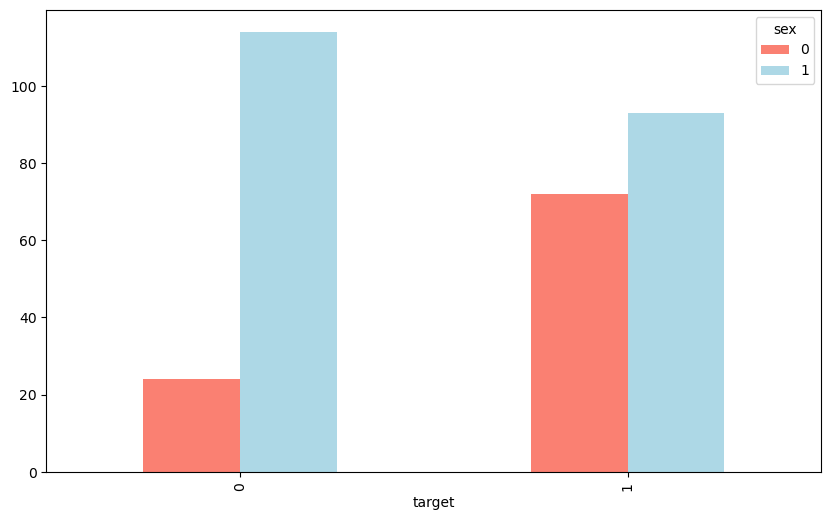

In [51]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

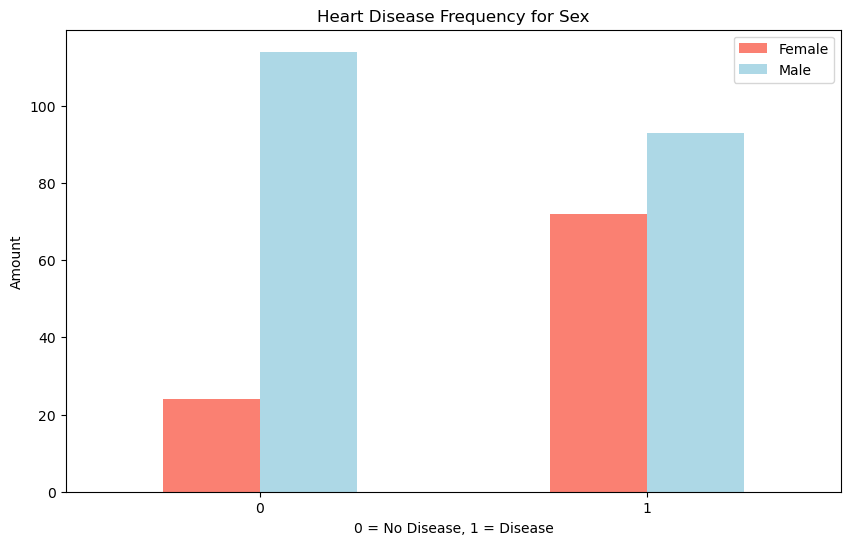

In [52]:


# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

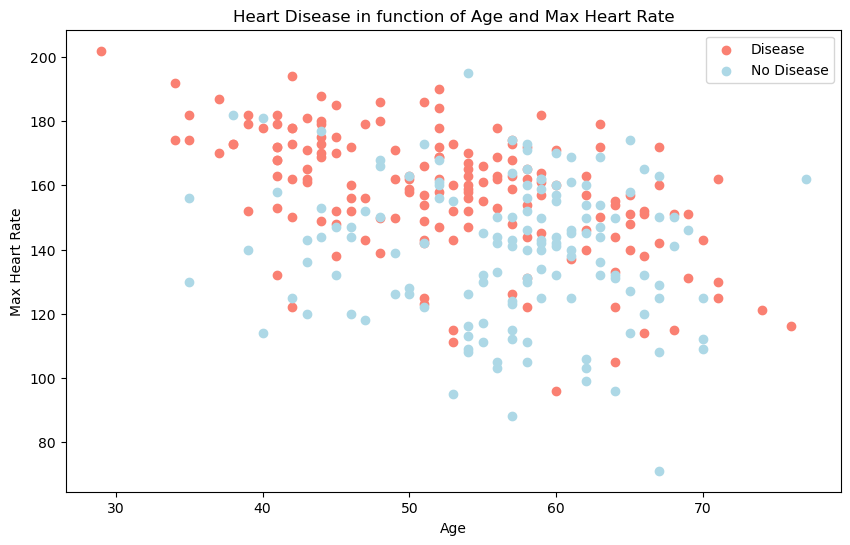

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

<AxesSubplot: ylabel='Frequency'>

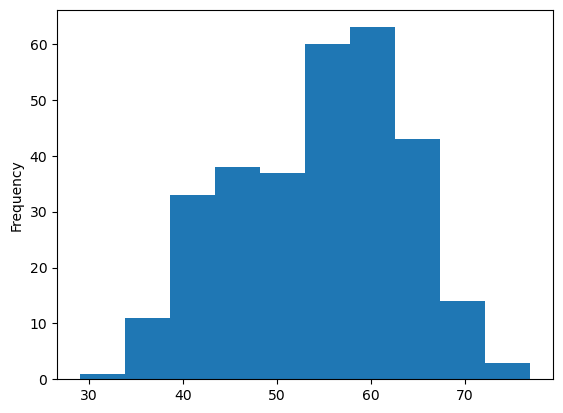

In [55]:
df.age.plot.hist()

In [56]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


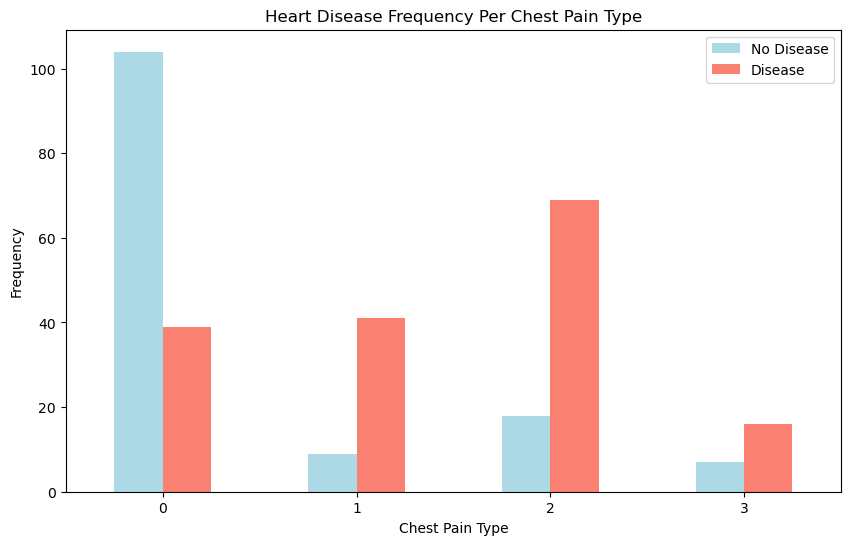

In [57]:
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [58]:
corr_matrix = df.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279321,0.213441,0.121308,-0.116211,-0.394370,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.063602,-0.197236,0.045032,-0.058196,-0.051004,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047841,-0.077894,0.094444,0.044421,0.299178,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279321,-0.063602,0.047841,1.000000,0.124985,0.175680,-0.110333,-0.029408,0.069590,0.193631,-0.120827,0.098237,0.060232,-0.141162
chol,0.213441,-0.197236,-0.077894,0.124985,1.000000,0.012861,-0.150129,-0.022730,0.066309,0.053027,-0.003022,0.070798,0.098285,-0.086391
fbs,0.121308,0.045032,0.094444,0.175680,0.012861,1.000000,-0.084189,0.001567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.110333,-0.150129,-0.084189,1.000000,0.037129,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.394370,-0.051004,0.299178,-0.029408,-0.022730,0.001567,0.037129,1.000000,-0.394595,-0.345398,0.378425,-0.207516,-0.105437,0.409645
exang,0.096801,0.141664,-0.394280,0.069590,0.066309,0.025665,-0.070733,-0.394595,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193631,0.053027,0.005747,-0.058770,-0.345398,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


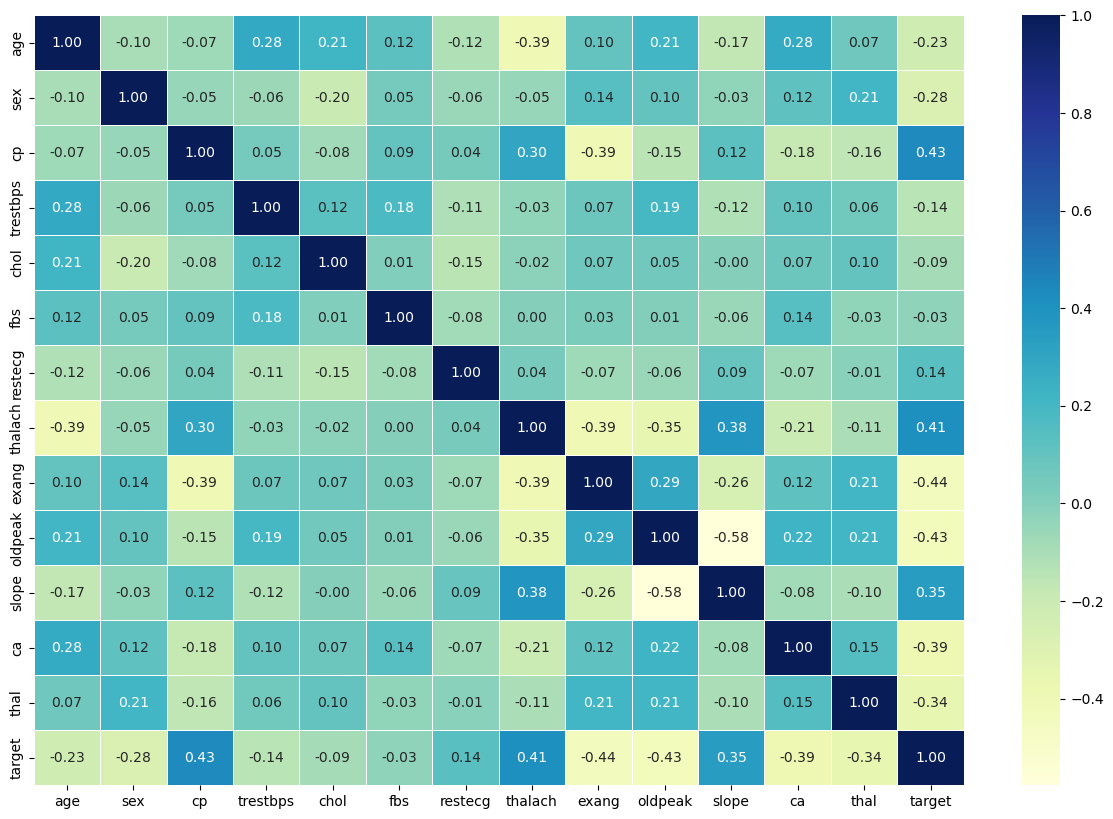

In [59]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [60]:
x = df.iloc[:,0:13].values

y = df.iloc[:,-1].values
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [61]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
#training model
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2,random_state=0)

# X_train.head()

In [63]:
Y_train,len(Y_train)

(array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]),
 242)

In [27]:
# X_test.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3
152,64,1,3,170.0,227.0,0,0,155.0,0,0.6,1,0,3
228,59,1,3,170.0,288.0,0,0,159.0,0,0.2,1,0,3
201,60,1,0,125.0,258.0,0,0,141.0,1,2.8,1,1,3
52,62,1,2,130.0,231.0,0,1,146.0,0,1.8,1,3,3


In [64]:
Y_test,len(Y_test)

(array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]),
 61)

In [69]:
models = {
    'knn':KNeighborsClassifier(),
    'logistic regression': LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models,X_train, X_test, Y_train, Y_test):
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores

In [78]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)
model_scores

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

{'knn': 0.639344262295082,
 'logistic regression': 0.8360655737704918,
 'Random Forest': 0.8688524590163934}

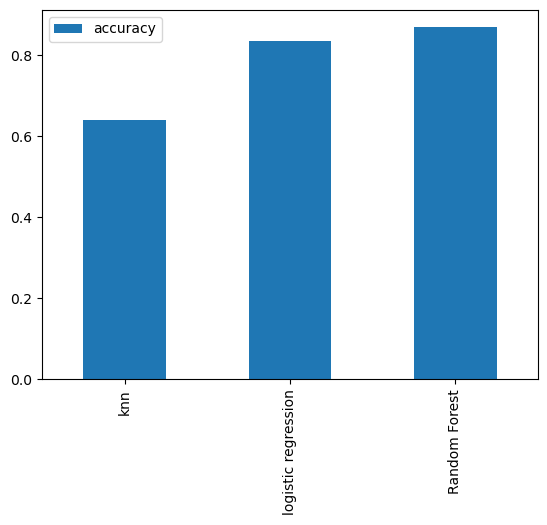

In [79]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [82]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, Y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, Y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, Y_test))

train_scores

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[1.0,
 0.8016528925619835,
 0.7933884297520661,
 0.768595041322314,
 0.7727272727272727,
 0.7355371900826446,
 0.7272727272727273,
 0.7107438016528925,
 0.7272727272727273,
 0.7231404958677686,
 0.7024793388429752,
 0.71900826446281,
 0.6983471074380165,
 0.6983471074380165,
 0.6859504132231405,
 0.6942148760330579,
 0.7024793388429752,
 0.6859504132231405,
 0.6859504132231405,
 0.6818181818181818]

Maximum KNN score on the test data: 70.49%


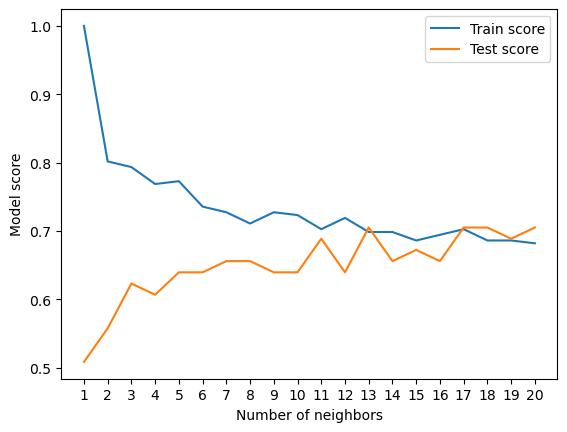

In [83]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [84]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [87]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [88]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.615848211066026}

In [89]:
rs_log_reg.score(X_test, Y_test)


0.8360655737704918

In [91]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [92]:
rs_rf.best_params_


{'n_estimators': 210,
 'min_samples_split': 18,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [94]:
rs_rf.score(X_test, Y_test)


0.8524590163934426

In [96]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [97]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [98]:
# Evaluate the model
gs_log_reg.score(X_test, Y_test)

0.8360655737704918

In [100]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [101]:
Y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


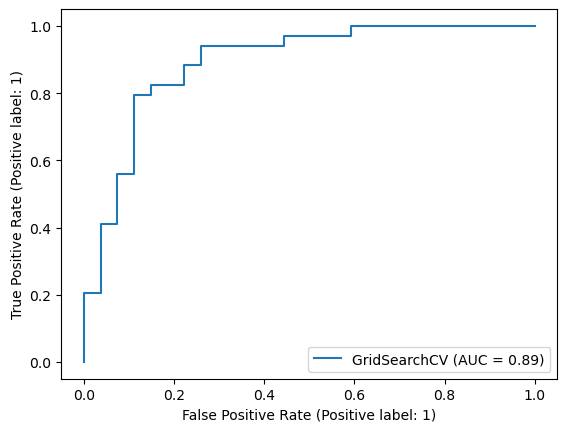

In [103]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, Y_test);

In [105]:
# Display confusion matrix
print(confusion_matrix(Y_test, y_preds))

[[21  6]
 [ 4 30]]


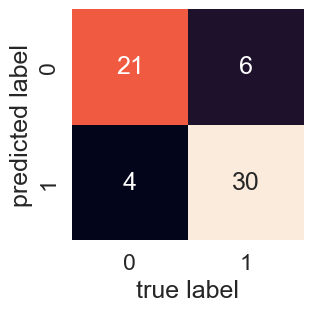

In [106]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(Y_test, y_preds)

In [108]:
 #Show classification report
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [110]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [111]:
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.615848211066026,
                         solver="liblinear")

In [113]:
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.83606557, 0.83606557, 0.85245902, 0.85      , 0.71666667])

In [114]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8182513661202186

In [116]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8080314937900077

In [117]:
cv_recall = np.mean(cross_val_score(clf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.8787878787878789

In [120]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8410792398119998

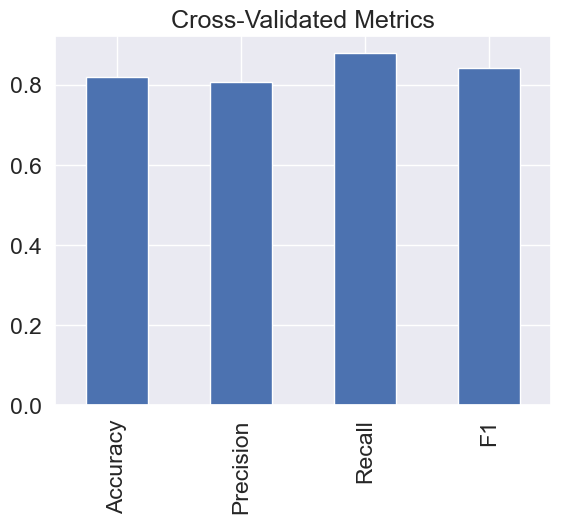

In [121]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [122]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, Y_train);

In [123]:
# Check coef_
clf.coef_

array([[ 0.00662471, -1.37570929,  0.72610393, -0.00899618, -0.00349359,
        -0.29805505,  0.21503566,  0.02900523, -0.75600365, -0.52755866,
         0.19791463, -0.83412904, -0.64191213]])

In [124]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.006624706595110392,
 'sex': -1.3757092854008952,
 'cp': 0.7261039289308123,
 'trestbps': -0.00899617552099842,
 'chol': -0.0034935897541233684,
 'fbs': -0.2980550545684853,
 'restecg': 0.2150356607581909,
 'thalach': 0.02900522897488702,
 'exang': -0.7560036531745365,
 'oldpeak': -0.5275586607674583,
 'slope': 0.19791462875641805,
 'ca': -0.8341290428773573,
 'thal': -0.6419121263020933}

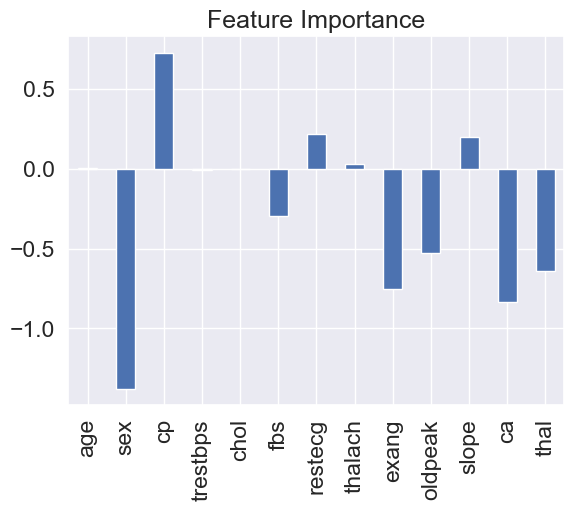

In [125]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -1.3, which means as the value for sex increases, the target value decreases.

We can see this by comparing the sex column to the target column.

In [126]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])